In [1]:
import numpy as np
import sys
sys.path.append('../..')
from utils.workflow import WorkflowModel
from utils.data import RK4DataGenerator, mono_beta
import utils.plotting as plotting
from utils.eval import eval_predictions

2025-12-12 22:50:23.170543: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Enable just-in-time compilation with XLA.



Set the default float type to float64


In [2]:
t0, tf, nop_data = 0, 50, 100
data_t = np.linspace(t0, tf, nop_data)
rkdata = RK4DataGenerator(mono_beta)
sir_comparts = rkdata.generate(data_t)
sir_data = rkdata.generate(data_t, noise_std=0.0)

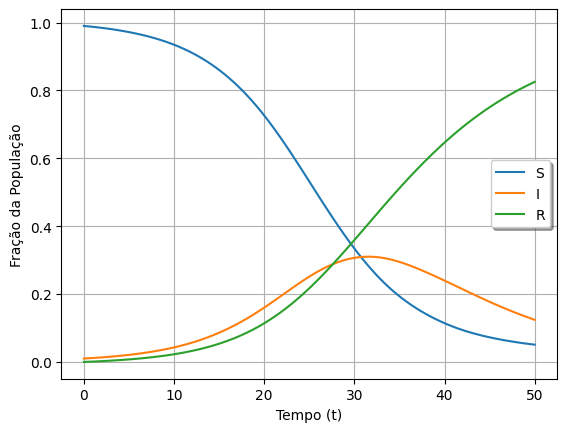

In [3]:
plotting.plot_rk_curves(data_t, sir_data)

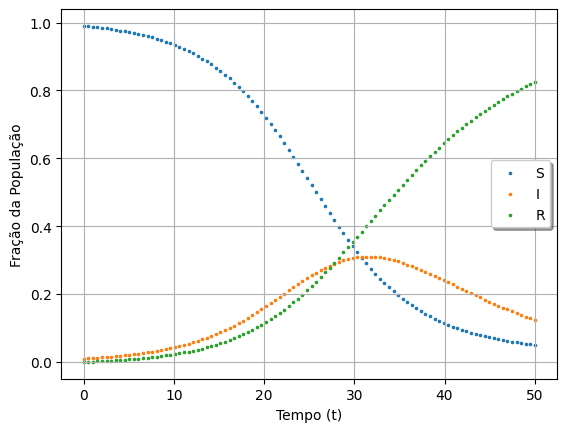

In [4]:
plotting.plot_rk_data(data_t, sir_data)

In [5]:
model = WorkflowModel(t0, tf, sir_data[:,1], data_t, scaling="min/max")
model.S0, model.I0, model.R0 

[<deepxde.icbc.initial_conditions.IC object at 0x7f32f01b5850>, <deepxde.icbc.initial_conditions.IC object at 0x7f33604fdad0>, <deepxde.icbc.initial_conditions.IC object at 0x7f335ef202d0>, <deepxde.icbc.boundary_conditions.PointSetBC object at 0x7f32cc762510>]
Compiling model...
'compile' took 0.006208 s



2025-12-12 22:50:26.079227: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1765590626.079950  592574 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2249 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


(np.float64(3.299518304099906),
 np.float64(0.0),
 np.float64(-0.03332846771818087))

In [6]:
model.train()

Training model...



2025-12-12 22:50:27.713029: I external/local_xla/xla/service/service.cc:163] XLA service 0x55dbe44f3300 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-12 22:50:27.713047: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-12-12 22:50:27.721636: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-12 22:50:27.783551: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
I0000 00:00:1765590628.056055  592574 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Step      Train loss                                                                          Test loss                                                                           Test metric
0         [1.53e-02, 4.86e-03, 2.22e-03, 8.45e+00, 1.09e+01, 0.00e+00, 1.11e-03, 1.32e-01]    [1.07e-02, 4.28e-03, 2.36e-03, 8.38e+00, 1.09e+01, 0.00e+00, 1.11e-03, 1.32e-01]    []  
100       [3.07e-03, 1.64e-03, 5.19e-03, 6.24e-04, 1.65e-04, 2.21e-05, 1.50e-04, 3.21e-02]    [1.46e-03, 1.75e-03, 4.14e-03, 1.42e-04, 1.65e-04, 2.21e-05, 1.50e-04, 3.21e-02]    []  
200       [1.63e-03, 1.16e-03, 3.79e-03, 2.63e-04, 1.17e-07, 3.63e-06, 2.57e-09, 2.85e-02]    [9.71e-04, 1.12e-03, 3.82e-03, 2.57e-04, 1.17e-07, 3.63e-06, 2.57e-09, 2.85e-02]    []  
300       [1.35e-03, 1.17e-03, 3.55e-03, 1.76e-04, 5.03e-07, 2.63e-06, 9.14e-08, 2.62e-02]    [1.00e-03, 1.10e-03, 3.62e-03, 1.98e-04, 5.03e-07, 2.63e-06, 9.14e-08, 2.62e-02]    []  
400       [1.25e-03, 1.11e-03, 3.41e-03, 9.94e-05, 5.74e-07, 1.61e-06, 1.42e-0

(<deepxde.model.LossHistory at 0x7f32cc749b10>,
 <deepxde.model.TrainState at 0x7f32cc74a090>)

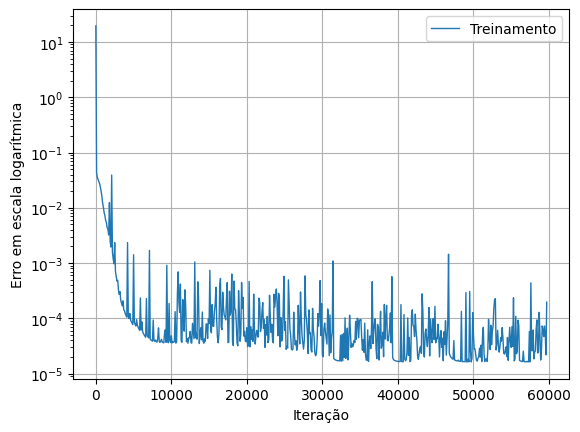

In [7]:
plotting.plot_losshistory(model.losshistory)

In [8]:
predictions = model.predict(data_t)

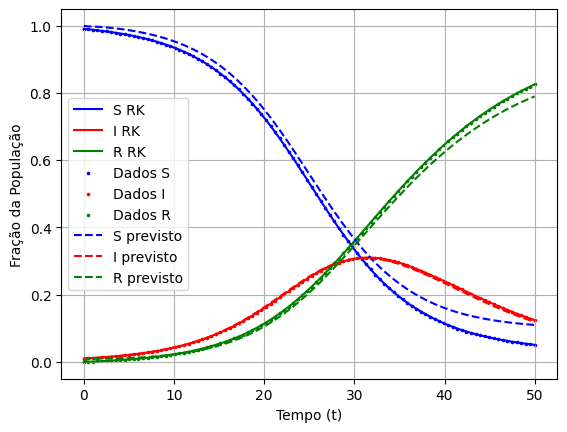

In [9]:
plotting.plot_results(sir_comparts, sir_data, predictions, data_t)

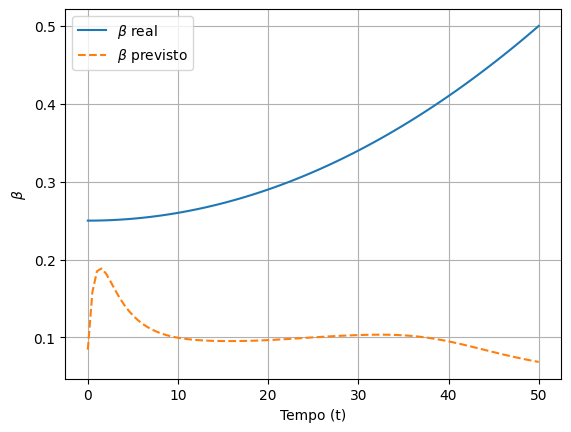

In [10]:
plotting.plot_beta(mono_beta, predictions[:,3], data_t)

In [11]:
eval_predictions(sir_comparts, predictions)

,compartiment,MSE,L2,L-infinity
0,S,0.001161,0.053643,0.059046
1,I,0.000011,0.017235,0.006094
2,beta,0.000268,0.038783,0.035815
